# Домашнее задание "Линейная алгебра. Матрицы".
## Уровень 0:

- Создайте матрицу 3 на 3, заполненную числами от 1 до 9
- Прибавьте к ней матрицу с единицами на диагонале
- Умножьте полученную матрицу на вектор (1, 2, 3)
- Посчитайте обратную матрицу к полученной в результате прибавления матрице

## Решение

In [1]:
import numpy
import matplotlib.pyplot as pyplot

#### 1) Создайте матрицу 3 на 3, заполненную числами от 1 до 9

In [2]:
matrix_3_3 = numpy.array([[8, 4, 3],
                          [5, 2, 7],
                          [8, 1, 2]])

matrix_3_3

array([[8, 4, 3],
       [5, 2, 7],
       [8, 1, 2]])

#### 2) Прибавьте к ней матрицу с единицами на диагонале

In [3]:
matrix_3_3 = matrix_3_3 + numpy.eye(3)

matrix_3_3

array([[9., 4., 3.],
       [5., 3., 7.],
       [8., 1., 3.]])

#### 3) Умножьте полученную матрицу на вектор (1, 2, 3)

In [4]:
matrix_3_3 * numpy.array([1, 2, 3])

array([[ 9.,  8.,  9.],
       [ 5.,  6., 21.],
       [ 8.,  2.,  9.]])

#### 4) Посчитайте обратную матрицу к полученной в результате прибавления матрице

In [5]:
numpy.linalg.inv(matrix_3_3)

array([[ 0.016, -0.072,  0.152],
       [ 0.328,  0.024, -0.384],
       [-0.152,  0.184,  0.056]])

## Уровень 1:

Дан объект в 2d пространстве:

```python
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
```

При помощи матричных операций выполните:
 - Уменьшить объект в два раза
 - Повернуть на 130 градусов
 - Отразить объект относительно прямой y=x
 - Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)

## Решение

In [6]:
class MatrixFactory:

    def make_origin_matrix(self):
        return numpy.array(
            [[-100, -100, 1],
             [-100, 100, 1],
             [100, 100, 1],
             [0, 0, 1],
             [100, -100, 1],
             [-100, -100, 1]])

    def make_rotation_axis_matrix(self):
        '''
        Создает матрицы для развартопа осям x и y
        :return:
        numpy.ndarray # ось x
        numpy.ndarray # ось y
        '''
        cos_130 = numpy.cos((130 * numpy.pi) / 180)
        sin_130 = numpy.sin(numpy.deg2rad(130))

        matrix_axis_x = numpy.array(
            [[1, 0,       0],
            [0, cos_130, -sin_130],
            [0, sin_130, cos_130]])

        matrix_axis_y = numpy.array(
            [[cos_130,  0, sin_130],
            [0,        1, 0],
            [-sin_130, 0, cos_130]])

        return matrix_axis_x, matrix_axis_y

    def make_mirror_matrix(self):
        '''
        Создает матрицу для отразижения относительно прямой y=x
        :return: umpy.ndarray
        '''
        return numpy.array([[0, 1, 0],
                            [1, 0, 0],
                            [0, 0, 1]])

    def make_matrix(self, axis_x, axis_y):
        '''
        Создает матрицу для с заданными значениями
        :return: umpy.ndarray
        '''
        return numpy.array(
            [[axis_x, axis_y, 0],
            [axis_x, axis_y, 0],
            [axis_x, axis_y, 0],
            [axis_x, axis_y, 0],
            [axis_x, axis_y, 0],
            [axis_x, axis_y, 0]])

def show_matrix(matrix):
    '''
    Показывает матрицу на оси `x` и `y`
    '''
    axis_x, axis_y = matrix[:,0], matrix[:,1]

    axis_min = 0
    axis_max = 0
    for vector in [axis_x, axis_y]:
        for item in vector:
            if item < axis_min: axis_min = item
            if item > axis_max: axis_max = item

    axis_min *= 1.5
    axis_max *= 1.5

    pyplot.plot(axis_x, axis_y)
    pyplot.ylim([axis_min, axis_max])
    pyplot.xlim([axis_min, axis_max])
    pyplot.grid()
    pyplot.show()



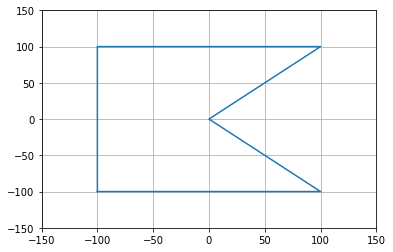

In [7]:
matrix_factory = MatrixFactory()
matrix_A = matrix_factory.make_origin_matrix()

show_matrix(matrix_A)

#### 1) Уменьшить объект в два раза

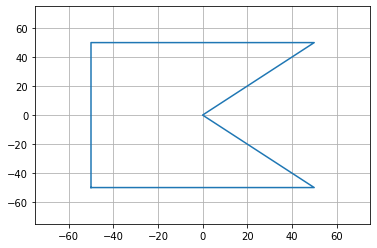

In [8]:
show_matrix(matrix_A / 2)

#### 2) Повернуть на 130 градусов

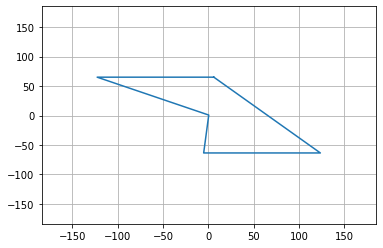

In [9]:
matrix_axis_x, matrix_axis_y = matrix_factory.make_rotation_axis_matrix()

show_matrix(matrix_A @ matrix_axis_x @ matrix_axis_y)

#### 3) Отразить объект относительно прямой y=x

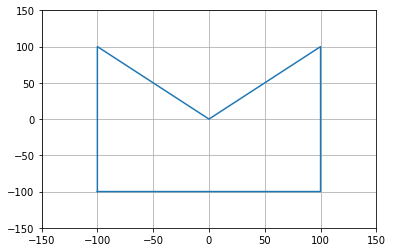

In [10]:
show_matrix(matrix_A @ matrix_factory.make_mirror_matrix())

#### 4) Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)

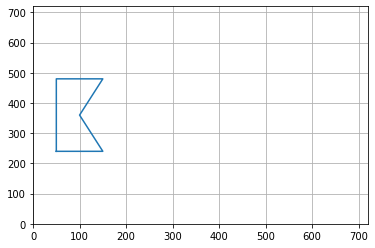

In [11]:
offset_matrix = matrix_factory.make_matrix(
    axis_x=200,
    axis_y=300)

zoom_matrix = matrix_factory.make_matrix(
    axis_x=0.5,
    axis_y=1.2)

show_matrix((matrix_A + offset_matrix) * zoom_matrix)